In [1]:
from parameters.params import WINDOWED_SPECTS_DIR_PATH, SPECT_FILE_FMT
from parameters.net_params import NETWORK_PARAMS
N_FFTS = NETWORK_PARAMS["n_ffts"]

In [2]:
from src.utilities import get_spect_window_shapes
input_shapes = get_spect_window_shapes(WINDOWED_SPECTS_DIR_PATH, SPECT_FILE_FMT, N_FFTS)

In [3]:
from src.network import MultiChannelTweetynet
tweetynet = MultiChannelTweetynet(**NETWORK_PARAMS, input_shapes=input_shapes)
labelvec_len = tweetynet.labelvec_len
print(tweetynet)

MultiChannelTweetynet(
  (cnn1_layers): ModuleDict(
    (512): Sequential(
      (0): PadSame()
      (1): Conv2d(1, 32, kernel_size=(16, 16), stride=(1, 1), dilation=(1, 8))
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=(16, 16), stride=(16, 16), padding=0, dilation=1, ceil_mode=False)
    )
  )
  (cnn2): Sequential(
    (0): PadSame()
    (1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  )
  (rnn): LSTM(256, 256, bidirectional=True)
  (fc): Linear(in_features=512, out_features=16, bias=True)
)


In [4]:
from src.utilities import sample_train_eval_files
from src.dataset import EvalDataset, TrainDataset
from parameters.params import WINDOWED_SPECTS_DIR_PATH, UNCUT_SPECTS_DIR_PATH, AUDIO_FILE_FMT, SPECT_FILE_FMT
from parameters.dataset_params import EVAL_DATASET_PARAMS, TRAIN_DATASET_PARAMS
from parameters.train_params import DEVICE, NUM_EPOCHS, TRAIN_BATCH_SIZE, EVAL_BATCH_SIZE, NUM_WORKERS, EVAL_STEP, LR, NUM_RUNS
from torch.utils.data import DataLoader
from src.model import TweetynetModel
import torch, pickle

In [5]:
all_xs = []
all_accs = []

for i in range(NUM_RUNS):

    print(f'RUN NUMBER: {i+1}')

    train_files_list, eval_files_list = sample_train_eval_files(
        UNCUT_SPECTS_DIR_PATH,
        40,
        10,
        AUDIO_FILE_FMT,
        SPECT_FILE_FMT,
    )

    train_dataset = TrainDataset(
        **TRAIN_DATASET_PARAMS,
        audio_files_list=train_files_list
    )
    eval_dataset = EvalDataset(
        **EVAL_DATASET_PARAMS,
        spect_files_list=eval_files_list
    )

    train_data = DataLoader(
        train_dataset,
        batch_size=TRAIN_BATCH_SIZE,
        num_workers=NUM_WORKERS,
        shuffle=True,
    )
    eval_data = DataLoader(
        eval_dataset,
        batch_size=EVAL_BATCH_SIZE,
        num_workers=NUM_WORKERS,
        shuffle=False, 
    )

    tweetynet = MultiChannelTweetynet(**NETWORK_PARAMS, input_shapes=input_shapes)

    run_params = {
        "net": tweetynet,
        "train_data": train_data,
        "eval_data": eval_data,
        "num_epochs": NUM_EPOCHS,
        "eval_step": EVAL_STEP,
        "lr": LR,
    }

    model = TweetynetModel(device=DEVICE)
    xs, accs = model.run(**run_params)
    all_xs.append(xs)
    all_accs.append(accs)


RUN NUMBER: 1
---------------- EPOCH 1 



                    Number Training Samples: 832
                    Eval Accuracy: 0.5916058947502446
                    

                    

                    Number Training Samples: 1664
                    Eval Accuracy: 0.5916058947502446
                    

                    

                    Number Training Samples: 2496
                    Eval Accuracy: 0.5916058947502446
                    

                    

                    Number Training Samples: 3328
                    Eval Accuracy: 0.5916058947502446
                    

                    

                    Number Training Samples: 4160
                    Eval Accuracy: 0.5916058947502446
                    

                    

                    Number Training Samples: 4992
                    Eval Accuracy: 0.5978443624214584
                    

                    

                    Number Training Samples: 5824
                    

KeyboardInterrupt: 

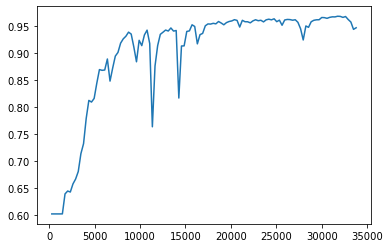

In [30]:
plt.plot(durs,acc_histories[0])

In [ ]:
with open("./results/onebird/100runs/33filters/350ms_256.512.1024.pkl", "wb") as handle:
    pickle.dump((all_xs, acc_histories), handle)

In [11]:
from glob import glob
import torch
import numpy as np
from matplotlib import pyplot as plt 


In [20]:
from parameters.params import WINDOW_DUR

In [29]:
len(durs)

116

In [22]:
std_d = {}
acc_d = {}
xs_d = {}
# for rf in result_files:
#     with open(rf, "rb") as handle:
#         all_xs, acc_histories = pickle.load(handle)
all_durs = []
for r in range(1):
    xs = []
    for i in range(EVAL_STEP, max(all_xs[r]), EVAL_STEP):
        xs.append(i)
    durs = []
    for x in xs:
        durs.append(x * WINDOW_DUR)
    all_durs.append(durs)
min_len = min(list(map(lambda x : len(x), all_durs)))
for i, d in enumerate(all_durs):
    all_durs[i] = d[:min_len]
for i,d in enumerate(all_durs):
    if len(acc_histories[i]) != len(d):
        acc_histories[i] = acc_histories[i][:len(d)]
acc_d[rf] = [sum(i) / 10 for i in zip(*acc_histories)]
xs_d[rf] = all_durs[0]
std_d[rf] = np.std(np.array(acc_histories).transpose(), 1)

NameError: name 'rf' is not defined

In [10]:
titles_colors = {
    "./results/onebird/33filters/350ms_256.512.1024.pkl": ("Wideband","blue") ,
    "./results/onebird/33filters/350ms_512.pkl": ("512", "green"), 
    "./results/onebird/33filters/350ms_256.pkl": ("256","orange"),
    "./results/onebird/33filters/350ms_1024.pkl": ("1024", "red"),
    "./results/onebird/96filters/350ms_256.512.1024.pkl": ("Wideband","purple") ,
    "./results/onebird/96filters/350ms_512.pkl": ("512", "yellow"), 
    "./results/onebird/96filters/350ms_256.pkl": ("256","gray"),
    "./results/onebird/96filters/350ms_1024.pkl": ("1024", "black"),
}

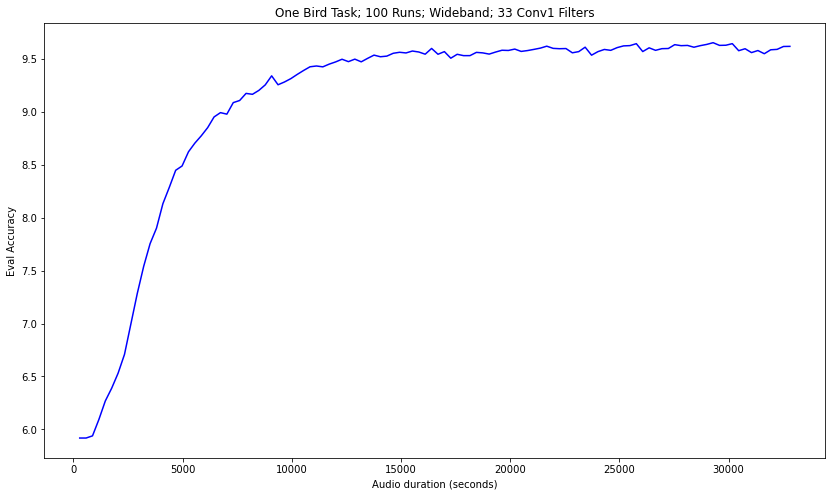

In [14]:
for n, std in acc_d.items():
    fig = plt.figure(figsize=(14,8))
    plt.xlabel("Audio duration (seconds)")
    plt.ylabel("Eval Accuracy")
    plt.title("One Bird Task; 100 Runs; Wideband; 33 Conv1 Filters")
    xs = xs_d[n]
    plt.plot(xs, std, color='blue')

from matplotlib import pyplot as plt 
fig = plt.figure(figsize=(14,8))
plt.title("One Bird Task; 33 Conv 1 Filters")
plt.xlabel("Audio Duration (seconds)")
plt.ylabel("Eval Set Accuracy")
for i, (n, std) in enumerate(acc_d.items()):
    if i >= 4:
        continue
    xs = xs_d[n]
    plt.plot(xs, std, color=titles_colors[n][1])
plt.legend(["Wideband", "512", "256", "1024"])

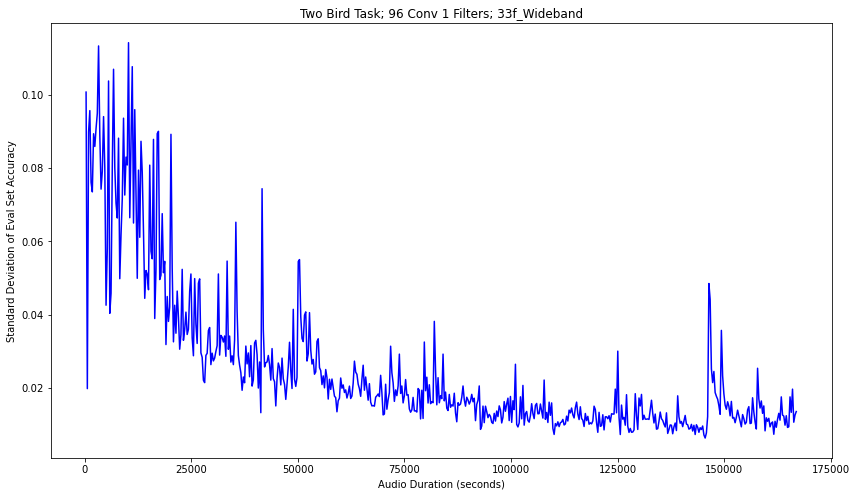

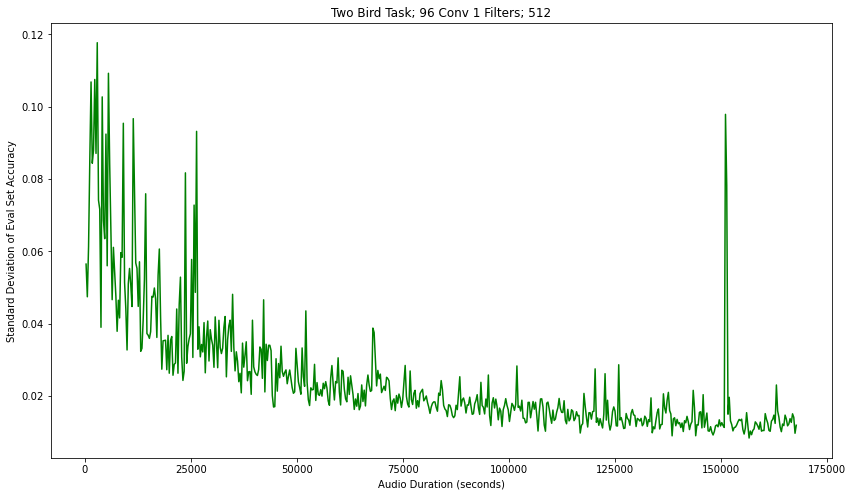

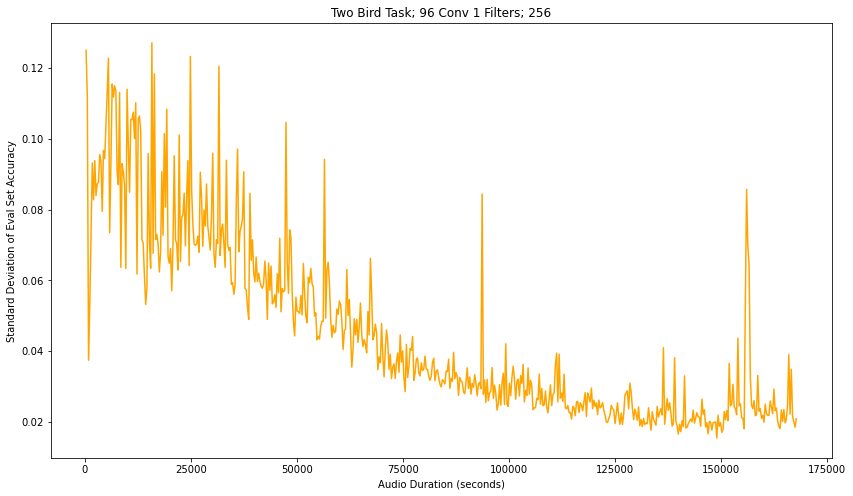

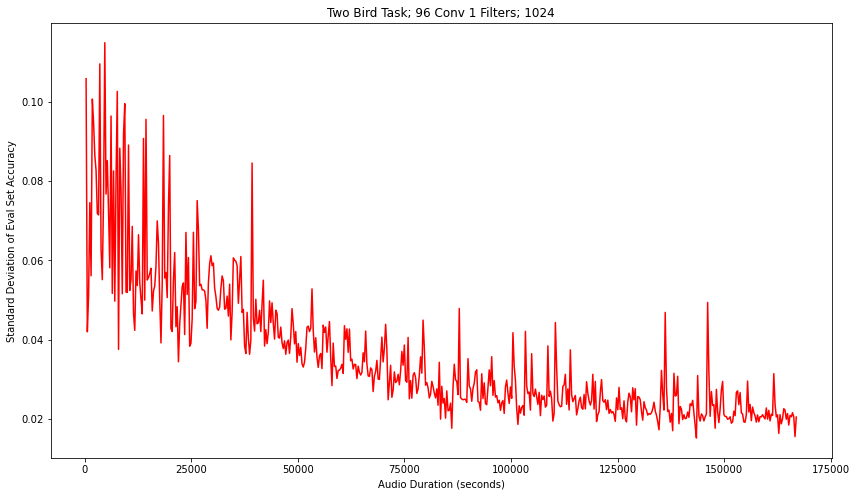

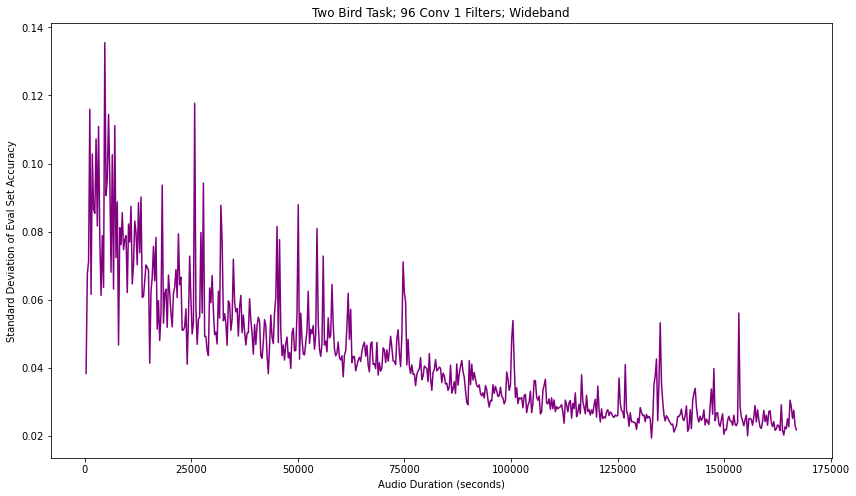

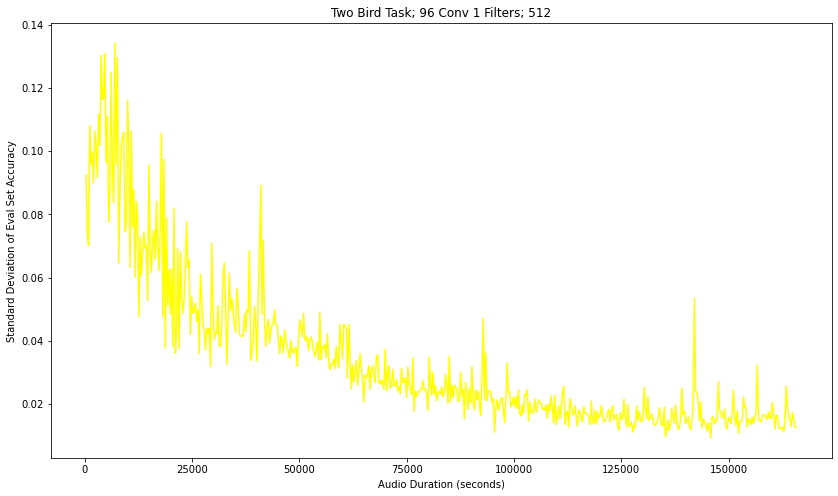

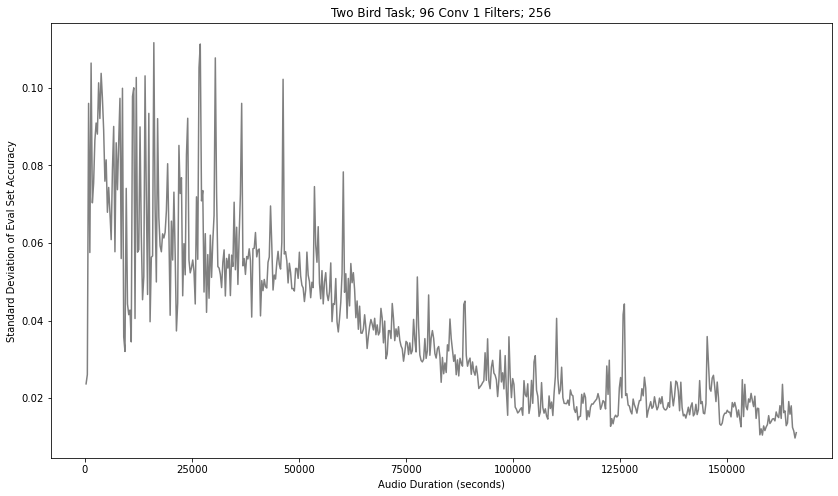

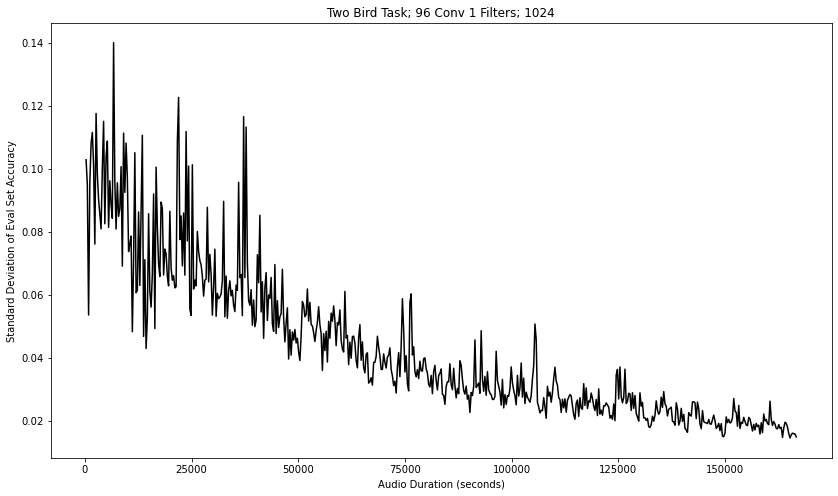

In [50]:

for n, std in std_d.items():
    fig = plt.figure(figsize=(14,8))
    plt.xlabel("Audio Duration (seconds)")
    plt.ylabel("Standard Deviation of Eval Set Accuracy")
    plt.title("Two Bird Task; 96 Conv 1 Filters; " + titles_colors[n][0])
    xs = xs_d[n]
    plt.plot(xs, std, color=titles_colors[n][1])

In [ ]:
train_samp = train_dataset[9]
windows = train_samp[0]
for nfft, window in windows.items():
    windows[nfft] = window.view(1,1,window.size()[0],window.size()[1])

In [ ]:
import numpy as np
for nfft, window in windows.items():
    fig = plt.figure(figsize=(15,5))
    plt.title("nfft = {}".format(nfft))
    window = np.flip(window[0][0].numpy(), axis=0)
    plt.imshow(window,cmap='hot')

In [ ]:
network = model.network
modules = {}
for n, m in network.named_modules():
    modules[n] = m

In [ ]:
cnn1256 = modules['cnn1_layers.256']
cnn1512 = modules['cnn1_layers.512']
cnn11024 = modules['cnn1_layers.1024']

In [ ]:
conv1256 = list(cnn1256.named_modules())[3][1]
kernels = list(conv1256.parameters())[0]
for i in range(kernels.size()[0]):
    kern = kernels[i][0]
    fig = plt.figure()
    plt.imshow(kern.cpu().detach().numpy())

In [ ]:
from matplotlib import pyplot as plt 
actmap_256 = cnn1256(windows[256])[0]
for i in range(actmap_256.size()[0]):
    fig = plt.figure(figsize=(15,5))
    map = actmap_256[i].cpu().detach().numpy()
    plt.imshow(np.flip(map, axis=0),  cmap='hot')

In [18]:
all_durs = []
for r in range(num_runs):
    xs = []
    for i in range(eval_step, max(all_xs[r]), eval_step):
        xs.append(i)
    durs = []
    for x in xs:
        durs.append(x * window_dur)
    all_durs.append(durs)

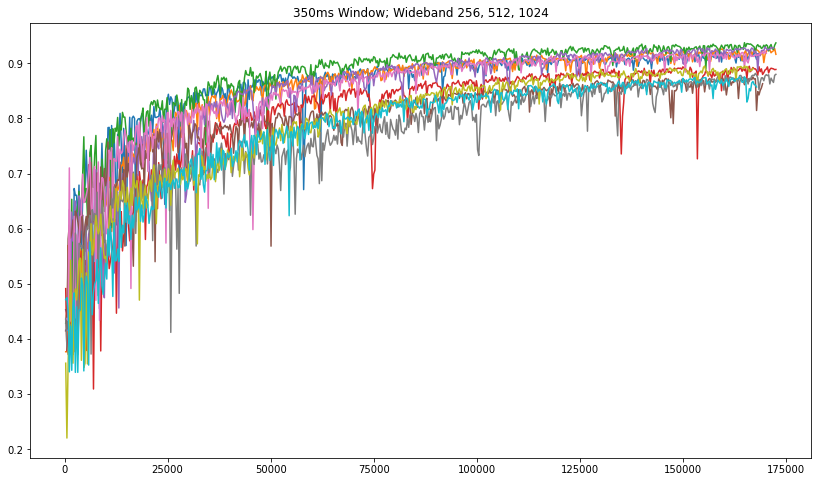

In [28]:
from matplotlib import pyplot as plt 
fig = plt.figure(figsize=(14,8))
plt.title("350ms Window; Wideband 256, 512, 1024")
for i in range(len(all_durs)):
    plt.plot(all_durs[i], acc_histories[i])

In [196]:
with open("./350ms_wideband.pkl", "rb") as handle:
    all_xs, acc_histories = pickle.load(handle)

In [197]:
from parameters.params import window_dur
window_dur = window_dur

In [198]:
all_durs = []
for r in range(num_runs):
    xs = []
    for i in range(eval_step, max(all_xs[r]), eval_step):
        xs.append(i)
    durs = []
    for x in xs:
        durs.append(x * window_dur)
    all_durs.append(durs)

In [199]:
min_len = min(list(map(lambda x : len(x), all_durs)))
for i, d in enumerate(all_durs):
    all_durs[i] = d[:min_len]

In [200]:
for i,d in enumerate(all_durs):
    if len(acc_histories[i]) != len(d):
        acc_histories[i] = acc_histories[i][:len(d)]

In [201]:
import numpy as np
std_350_wideband = np.std(np.array(acc_histories).transpose(), 1)
std_350_wb_xs = all_durs[0]


In [195]:
std_350_512 = np.std(np.array(acc_histories).transpose(), 1)
std_350_512_xs = all_durs[0]

In [189]:
std_700_512 = np.std(np.array(acc_histories).transpose(), 1)
std_700_512_xs = all_durs[0]

In [183]:
std_700_wideband = np.std(np.array(acc_histories).transpose(), 1)
std_700_wb_xs = all_durs[0]

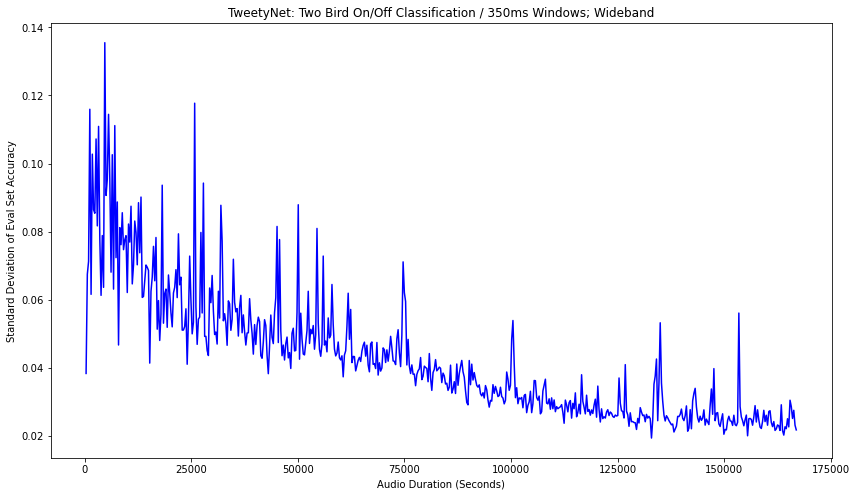

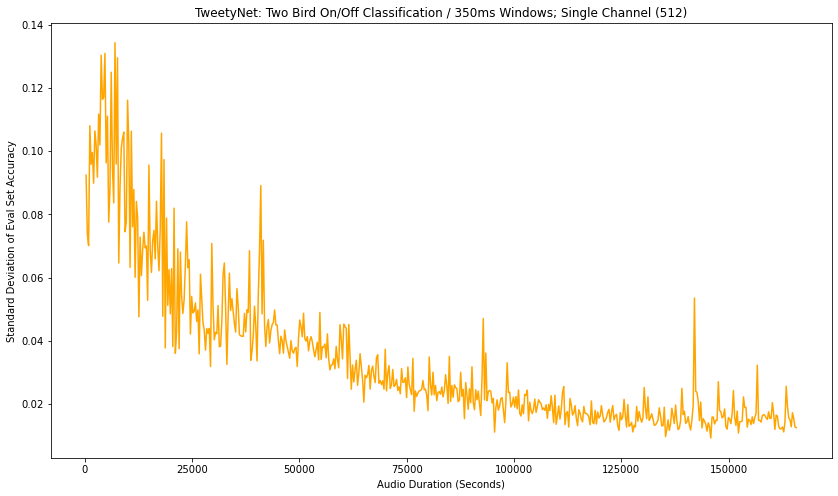

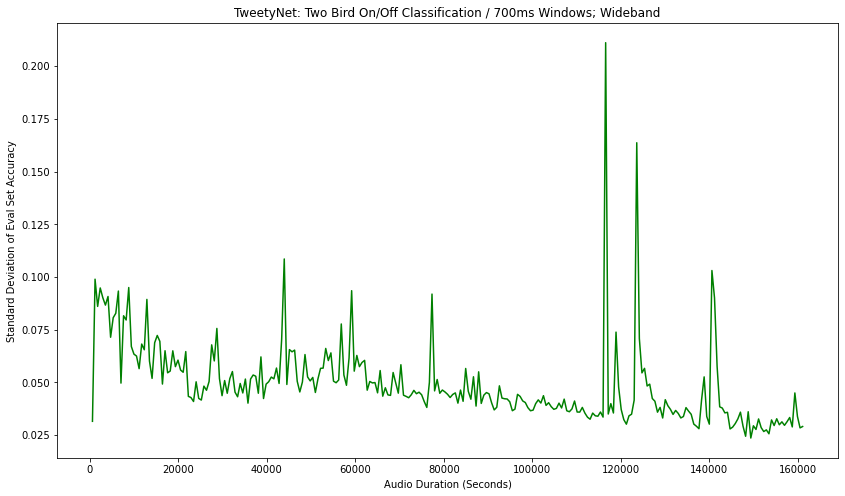

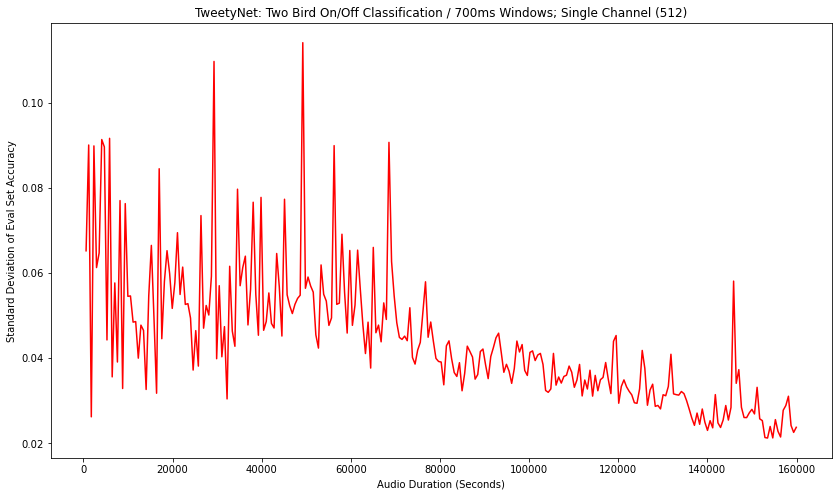

In [212]:
plt.figure(figsize=(14,8))
plt.xlabel("Audio Duration (Seconds)")
plt.ylabel("Standard Deviation of Eval Set Accuracy")
plt.title("TweetyNet: Two Bird On/Off Classification / 350ms Windows; Wideband")
plt.plot(std_350_wb_xs, std_350_wideband, color='blue')
plt.figure(figsize=(14,8))
plt.xlabel("Audio Duration (Seconds)")
plt.ylabel("Standard Deviation of Eval Set Accuracy")
plt.title("TweetyNet: Two Bird On/Off Classification / 350ms Windows; Single Channel (512)")
plt.plot(std_350_512_xs, std_350_512, color='orange')
plt.figure(figsize=(14,8))
plt.xlabel("Audio Duration (Seconds)")
plt.ylabel("Standard Deviation of Eval Set Accuracy")
plt.title("TweetyNet: Two Bird On/Off Classification / 700ms Windows; Wideband")
plt.plot(std_700_wb_xs, std_700_wideband, color='green')
plt.figure(figsize=(14,8))
plt.xlabel("Audio Duration (Seconds)")
plt.ylabel("Standard Deviation of Eval Set Accuracy")
plt.title("TweetyNet: Two Bird On/Off Classification / 700ms Windows; Single Channel (512)")
plt.plot(std_700_512_xs, std_700_512, color='red')

In [124]:
avg_acc_350_wide = [sum(i) / 10 for i in zip(*acc_histories)]
xs_350_wide = all_durs[0]

In [118]:
avg_acc_350_512 = [sum(i) / 10 for i in zip(*acc_histories)]
xs_350_512 = all_durs[0]

In [106]:
avg_acc_700_wide = [sum(i) / 10 for i in zip(*acc_histories)]
xs_700_wide = all_durs[0]

In [112]:
avg_acc_700_512 = [sum(i) / 10 for i in zip(*acc_histories)]
xs_700_512 = all_durs[0]

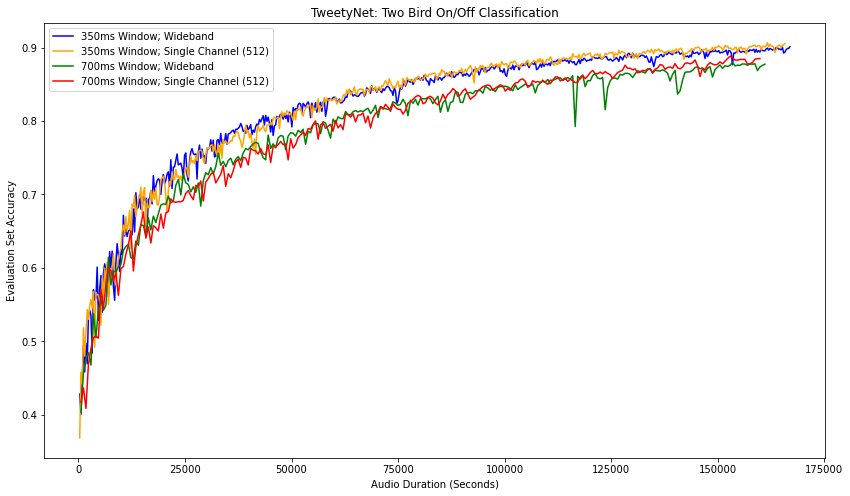

In [213]:
from matplotlib import pyplot as plt 
fig = plt.figure(figsize=(14,8))
plt.xlabel("Audio Duration (Seconds)")
plt.ylabel("Evaluation Set Accuracy")
plt.title("TweetyNet: Two Bird On/Off Classification")
plt.plot(xs_350_wide, avg_acc_350_wide, color='blue')
plt.plot(xs_350_512, avg_acc_350_512, color='orange')
plt.plot(xs_700_wide, avg_acc_700_wide, color='green')
plt.plot(xs_700_512, avg_acc_700_512, color='red')
plt.legend(
    ["350ms Window; Wideband", 
    "350ms Window; Single Channel (512)",
    "700ms Window; Wideband",
    "700ms Window; Single Channel (512)"]
)


In [53]:

for i in all_durs:
    print(len(i))

279
283
278
281
276
281
279
278
275
276


In [40]:
for i in acc_histories:
    print(len(i))

579
576
573
581
566
586
580
587
587
593
